## Germany Data‑Jobs Market Pulse — HR Analytics Angle

### Project
Collect and analyze live job postings from the German Federal Employment Agency to produce a fast market pulse: hotspots by location and employer, roles in demand, weekly/weekday cadence, and posting freshness. The angle is HR‑practical: turn raw postings into actionable recruiting moves (when/where to focus, which roles to promote, and how to monitor freshness). 

### Business Question
Where is demand for data-relevant roles concentrated in Bamberg and its surrounding region (within 100 km) — across employers, job titles, and posting freshness — and what should HR prioritize to fill pipelines efficiently?

In [87]:
# wipes all variables, functions, and imports from memory
%reset -f

### Data Collection

In [88]:
# Imports
import requests
import pandas as pd
import time  # optional: to avoid rate limits
import matplotlib.pyplot as plt
import seaborn as sns

# API Config
API_URL = "https://rest.arbeitsagentur.de/jobboerse/jobsuche-service/pc/v4/jobs"
API_KEY = "jobboerse-jobsuche"  # Demo key

# Base params 
params = {
    "angebotsart": 1,
    "wo": "Bamberg",
    "umkreis": 100,
    "arbeitszeit": "vz;tz",
    "pav": False,
    "size": 100,
    "page": 1,
    "veroeffentlichtseit": 365
}

headers = {
    "X-API-Key": API_KEY
}

# Fetch all pages
all_jobs = []
page = 1

while page <= 100:  # hard limit, max. 100 pages
    params["page"] = page
    response = requests.get(API_URL, headers=headers, params=params)

    if response.status_code != 200:
        print(f"Stopped at page {page}, status {response.status_code}")
        break

    data = response.json()
    jobs = data.get("stellenangebote", [])

    if not jobs:
        print(f" All jobs fetched up to page {page-1}")
        break

    all_jobs.extend(jobs)
    print(f" Page {page}: {len(jobs)} jobs fetched")

    page += 1
    time.sleep(0.5)

# Normalize to DataFrame
if all_jobs:
    df_all = pd.json_normalize(all_jobs)
    print(f"\n Total jobs collected: {len(df_all)}")
    df_all.to_csv("bamberg_jobs_100km.csv", index=False, encoding='utf-8')
    print(" Saved to 'bamberg_jobs_100km.csv'")
else:
    print(" No jobs found.")


 Page 1: 100 jobs fetched
 Page 2: 100 jobs fetched
 Page 3: 100 jobs fetched
 Page 4: 100 jobs fetched
 Page 5: 100 jobs fetched
 Page 6: 100 jobs fetched
 Page 7: 100 jobs fetched
 Page 8: 100 jobs fetched
 Page 9: 100 jobs fetched
 Page 10: 100 jobs fetched
 Page 11: 100 jobs fetched
 Page 12: 100 jobs fetched
 Page 13: 100 jobs fetched
 Page 14: 100 jobs fetched
 Page 15: 100 jobs fetched
 Page 16: 100 jobs fetched
 Page 17: 100 jobs fetched
 Page 18: 100 jobs fetched
 Page 19: 100 jobs fetched
 Page 20: 100 jobs fetched
 Page 21: 100 jobs fetched
 Page 22: 100 jobs fetched
 Page 23: 100 jobs fetched
 Page 24: 100 jobs fetched
 Page 25: 100 jobs fetched
 Page 26: 100 jobs fetched
 Page 27: 100 jobs fetched
 Page 28: 100 jobs fetched
 Page 29: 100 jobs fetched
 Page 30: 100 jobs fetched
 Page 31: 100 jobs fetched
 Page 32: 100 jobs fetched
 Page 33: 100 jobs fetched
 Page 34: 100 jobs fetched
 Page 35: 100 jobs fetched
 Page 36: 100 jobs fetched
 Page 37: 100 jobs fetched
 Page 38: 

### Data & Quality Checks

In [89]:
display(df_all.head(10))

,beruf,titel,refnr,arbeitgeber,aktuelleVeroeffentlichungsdatum,modifikationsTimestamp,eintrittsdatum,kundennummerHash,arbeitsort.ort,arbeitsort.strasse,arbeitsort.region,arbeitsort.land,arbeitsort.koordinaten.lat,arbeitsort.koordinaten.lon,arbeitsort.entfernung,externeUrl,arbeitsort.plz,arbeitsort.ortsteil,arbeitsort.adresszusatz
0,Maschinen- und Anlagenführer/in - Textiltechni...,Maschinenbediener (m/w/d),17560-3d15ec6d846848d-S,AlphaConsult KG,2025-10-01,2025-10-01T09:21:01.337,2025-10-01,33vr--2yF62dJFe2Jw0D31flIY3naE7xnR69vKTQbPA=,Bamberg,null,Bayern,Deutschland,49.894025,10.893212,1,NaN,NaN,NaN,NaN
1,Helfer/in - Hotel,Student*in ? Aushilfe - Event- & Kongress-Zentrum,12518-L4YO7Q-LB2-S,STUDENTpartout GmbH - Standort Nürnberg,2025-10-01,2025-10-01T12:16:07.929,2025-10-01,NaN,Bamberg,null,Bayern,Deutschland,49.893037,10.887550,1,https://www.hogapage.de/jobs/studentenjob-1-in...,96047,NaN,NaN
2,Fachmann/-frau - Restaurants und Veranstaltung...,Aushilfe - (w/m/d) - Event- & Kongress-Zentrum,12518-U69DTW-AP3-S,BUHL Personal GmbH - Niederlassung Nürnberg,2025-10-01,2025-10-01T12:14:06.234,2025-10-01,NaN,Bamberg,null,Bayern,Deutschland,49.893037,10.887550,1,https://www.hogapage.de/jobs/eventservicekraft...,96047,NaN,NaN
3,Heilerziehungspfleger/in - Rehabilitation,Heilerziehungspfleger (m/w/d),14751-373A49729-S,Tempton Personaldienstleistungen GmbH NL Nürnb...,2025-10-01,2025-10-01T08:10:24.264,2025-10-01,NaN,Bamberg,null,Bayern,Deutschland,49.893037,10.887550,1,https://bewerbung.jobs/92f22dc7-4e1a-48a9-8dda...,96047,NaN,NaN
4,Gesundheits- und Kinderkrankenpfleger/in,Gesundheits- und Kinderkrankenpfleger (m/w/d),14751-373A50241-S,Tempton Personaldienstleistungen GmbH NL Nürnb...,2025-10-01,2025-10-01T08:10:24.112,2025-10-01,NaN,Bamberg,null,Bayern,Deutschland,49.893037,10.887550,1,https://bewerbung.jobs/9f709e92-5a3c-4954-8a52...,96047,NaN,NaN
5,Sozialpädagogische/r Assistent/in / Kinderpfle...,Sozialpädagogischer Assistent / Kinderpfleger ...,14751-373A49726-S,Tempton Personaldienstleistungen GmbH NL Nürnb...,2025-10-01,2025-10-01T08:10:22.881,2025-10-01,NaN,Bamberg,Hauptstraße 1,Bayern,Deutschland,49.893037,10.887550,1,https://bewerbung.jobs/877b4e36-a482-40aa-be0d...,96047,NaN,NaN
6,Fachkrankenpfleger/in - Intensivpflege/Anästhesie,Fachkrankenpfleger - Intensivpflege/Anästhesie...,14751-373A50242-S,Tempton Personaldienstleistungen GmbH NL Nürnb...,2025-10-01,2025-10-01T08:10:22.569,2025-10-01,NaN,Bamberg,null,Bayern,Deutschland,49.893037,10.887550,1,https://bewerbung.jobs/e4b7031d-91d9-47b9-a66f...,96047,NaN,NaN
7,Pädagogische Fachkraft - Grundschulkindbetreuung,Pädagogische Fachkraft (m/w/d),14751-373A49728-S,Tempton Personaldienstleistungen GmbH NL Nürnb...,2025-10-01,2025-10-01T08:10:22.419,2025-10-01,NaN,Bamberg,null,Bayern,Deutschland,49.893037,10.887550,1,https://bewerbung.jobs/8a8c5f1d-7673-49f6-b860...,96047,NaN,NaN
8,Pflegefachmann/-frau (Gesundheits- und Kranken...,Pflegefachmann/Pflegefachfrau (m/w/d),14751-373A49727-S,Tempton Personaldienstleistungen GmbH NL Nürnb...,2025-10-01,2025-10-01T08:10:22.219,2025-10-01,NaN,Bamberg,null,Bayern,Deutschland,49.893037,10.887550,1,https://bewerbung.jobs/7443756d-fbcf-42c7-9f97...,96047,NaN,NaN
9,Gesundheits- und Krankenpfleger/in,Gesundheits- und Krankenpfleger (m/w/d),14751-373A48738-S,Tempton Personaldienstleistungen GmbH NL Nürnb...,2025-10-01,2025-10-01T08:10:22.021,2025-10-01,NaN,Bamberg,null,Bayern,Deutschland,49.893037,10.887550,1,https://bewerbung.jobs/052fc01c-2c3d-4095-ad08...,96047,NaN,NaN


In [90]:
print(df_all.shape)

(10000, 19)


In [91]:
print("Min/Max posting date:", 
      df_all['aktuelleVeroeffentlichungsdatum'].min(), 
      df_all['aktuelleVeroeffentlichungsdatum'].max())

Min/Max posting date: 2017-08-28 2025-10-01


In [92]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   beruf                            10000 non-null  object 
 1   titel                            9906 non-null   object 
 2   refnr                            10000 non-null  object 
 3   arbeitgeber                      9990 non-null   object 
 4   aktuelleVeroeffentlichungsdatum  10000 non-null  object 
 5   modifikationsTimestamp           10000 non-null  object 
 6   eintrittsdatum                   10000 non-null  object 
 7   kundennummerHash                 7557 non-null   object 
 8   arbeitsort.ort                   9998 non-null   object 
 9   arbeitsort.strasse               10000 non-null  object 
 10  arbeitsort.region                9999 non-null   object 
 11  arbeitsort.land                  10000 non-null  object 
 12  arbeitsort.koordina

In [93]:
df_all.describe()

,arbeitsort.koordinaten.lat,arbeitsort.koordinaten.lon
count,10000.000000,10000.000000
mean,49.770021,10.920089
std,0.300789,0.405405
min,49.004725,9.520591
25%,49.525591,10.835210
50%,49.747115,10.984862
75%,49.920506,11.079176
max,50.772173,12.251839


In [120]:
print("Unique employers:", df_all['arbeitgeber'].nunique())
print("Active postings:", len(df_all))

Unique employers: 2803
Active postings: 9993


In [94]:
duplicate_count = df_all.duplicated().sum()
print(f" Duplicate rows found: {duplicate_count}")

 Duplicate rows found: 7


In [95]:
df_all = df_all.drop_duplicates()
print(" Remaining duplicate rows:", df_all.duplicated().sum())

 Remaining duplicate rows: 0


In [96]:
print("\nMissing values")
print(df_all.isnull().sum())


Missing values
beruf                                 0
titel                                94
refnr                                 0
arbeitgeber                          10
aktuelleVeroeffentlichungsdatum       0
modifikationsTimestamp                0
eintrittsdatum                        0
kundennummerHash                   2440
arbeitsort.ort                        2
arbeitsort.strasse                    0
arbeitsort.region                     1
arbeitsort.land                       0
arbeitsort.koordinaten.lat            0
arbeitsort.koordinaten.lon            0
arbeitsort.entfernung                 0
externeUrl                         7572
arbeitsort.plz                      626
arbeitsort.ortsteil                9812
arbeitsort.adresszusatz            9899
dtype: int64


### Cleaning & Feature Engineering

In [97]:
# Get unique cities where PLZ is missing
missing_plz_cities = df_all[df_all['arbeitsort.plz'].isnull()]['arbeitsort.ort'].dropna().unique()
print("🏙️ Cities with missing PLZs:\n", missing_plz_cities)


🏙️ Cities with missing PLZs:
 ['Bamberg' 'Forchheim, Oberfranken' 'Erlangen' 'Fürth, Bayern' 'Bayreuth'
 'Nürnberg, Mittelfranken' 'Zirndorf, Mittelfranken' 'Würzburg'
 'Herzogenaurach' 'Buttenheim' 'Baunach' 'Schwabach' 'Amberg, Oberpfalz'
 'Coburg' 'Altdorf bei Nürnberg' 'Tauberbischofsheim' 'Postbauer-Heng'
 'Neumarkt in der Oberpfalz' 'Gunzenhausen am Altmühlsee' 'Kulmbach'
 'Lichtenfels, Bayern' 'Schleiz' 'Schweinfurt' 'Kronach, Oberfranken'
 'Ilmenau, Thüringen' 'Hof, Saale' 'Haßfurt' 'Ebensfeld' 'Hildburghausen'
 'Markt Bibart']


In [98]:
# Filter rows where PLZ is present
df_with_plz = df_all[df_all['arbeitsort.plz'].notnull()]

# Get cities that have missing PLZ
cities_with_missing_plz = df_all[df_all['arbeitsort.plz'].isnull()]['arbeitsort.ort'].dropna().unique()

# Loop through and check if those cities have PLZs elsewhere
for city in cities_with_missing_plz:
    matching_rows = df_with_plz[df_with_plz['arbeitsort.ort'] == city]
    if not matching_rows.empty:
        plz_values = matching_rows['arbeitsort.plz'].unique()
        print(f" {city}: Found PLZ(s) → {plz_values}")
    else:
        print(f" {city}: No PLZ found in dataset")


 Bamberg: Found PLZ(s) → ['96047' '96052' '96050' '96049']
 Forchheim, Oberfranken: Found PLZ(s) → ['91301']
 Erlangen: Found PLZ(s) → ['91054' '91056' '91052' '91058']
 Fürth, Bayern: Found PLZ(s) → ['90765' '90768' '90766' '90762' '90763']
 Bayreuth: Found PLZ(s) → ['95445' '95447' '95444' '95448']
 Nürnberg, Mittelfranken: Found PLZ(s) → ['90427' '90411' '90425' '90491' '90419' '90429' '90409' '90403' '90431'
 '90489' '90402' '90482' '90443' '90459' '90478' '90449' '90461' '90441'
 '90451' '90471' '90475' '90473' '90453' '90408' '90480' '90469' '90455'
 '90439']
 Zirndorf, Mittelfranken: Found PLZ(s) → ['90513']
 Würzburg: Found PLZ(s) → ['97076' '97074' '97080' '97084' '97072' '97070' '97078' '97082']
 Herzogenaurach: Found PLZ(s) → ['91074']
 Buttenheim: Found PLZ(s) → ['96155']
 Baunach: Found PLZ(s) → ['96148']
 Schwabach: Found PLZ(s) → ['91126']
 Amberg, Oberpfalz: Found PLZ(s) → ['92224']
 Coburg: Found PLZ(s) → ['96450']
 Altdorf bei Nürnberg: Found PLZ(s) → ['90518']
 Taube

In [99]:
# Loop through and check if those cities have PLZs elsewhere
unmatched_cities = []

for city in missing_plz_cities:
    matching_rows = df_with_plz[df_with_plz['arbeitsort.ort'] == city]
    if not matching_rows.empty:
        plz_values = matching_rows['arbeitsort.plz'].unique()
    else:
        print(f" {city}: No PLZ found in dataset")
        unmatched_cities.append(city)

# Show unmatched cities at the end
if unmatched_cities:
    print("\n Cities still missing PLZs in all data:\n", unmatched_cities)
else:
    print("\n All cities have matching PLZs elsewhere in the dataset.")


 All cities have matching PLZs elsewhere in the dataset.


In [100]:
# Filter rows where PLZ is present
df_with_plz = df_all[df_all['arbeitsort.plz'].notnull()]

# Check PLZ availability and build mapping
unmatched_cities = []
city_plz_mapping = {}

for city in missing_plz_cities:
    matching_rows = df_with_plz[df_with_plz['arbeitsort.ort'] == city]
    if not matching_rows.empty:
        plz_values = matching_rows['arbeitsort.plz'].unique()
        # Choose the most frequent PLZ (or first if tied)
        most_common_plz = matching_rows['arbeitsort.plz'].mode().iloc[0]
        city_plz_mapping[city] = most_common_plz
    else:
        print(f"❌ {city}: No PLZ found in dataset")
        unmatched_cities.append(city)

# Apply the mapping to fill missing PLZs
df_all['arbeitsort.plz'] = df_all.apply(
    lambda row: city_plz_mapping.get(row['arbeitsort.ort'], row['arbeitsort.plz'])
    if pd.isnull(row['arbeitsort.plz']) else row['arbeitsort.plz'],
    axis=1
)

# Report
print("\nRemaining missing PLZs:", df_all['arbeitsort.plz'].isnull().sum())

if unmatched_cities:
    print("Cities still missing PLZs:\n", unmatched_cities)
else:
    print("All cities filled successfully with PLZs.")



Remaining missing PLZs: 0
All cities filled successfully with PLZs.


In [101]:
print(df_all[df_all['arbeitsort.plz'].isnull()][['titel','arbeitgeber','arbeitsort.region','arbeitsort.ort','arbeitsort.strasse']].head())


Empty DataFrame
Columns: [titel, arbeitgeber, arbeitsort.region, arbeitsort.ort, arbeitsort.strasse]
Index: []


In [102]:
print("\nMissing values")
print(df_all.isnull().sum())


Missing values
beruf                                 0
titel                                94
refnr                                 0
arbeitgeber                          10
aktuelleVeroeffentlichungsdatum       0
modifikationsTimestamp                0
eintrittsdatum                        0
kundennummerHash                   2440
arbeitsort.ort                        2
arbeitsort.strasse                    0
arbeitsort.region                     1
arbeitsort.land                       0
arbeitsort.koordinaten.lat            0
arbeitsort.koordinaten.lon            0
arbeitsort.entfernung                 0
externeUrl                         7572
arbeitsort.plz                        0
arbeitsort.ortsteil                9812
arbeitsort.adresszusatz            9899
dtype: int64


In [103]:
# Count missing vs. present values for job titles and employers

missing_count = df_all['titel'].isnull().sum()
present_count = df_all['titel'].notnull().sum()

print(f" Title present: {present_count}")
print(f" Title missing: {missing_count}")

missing_count = df_all['arbeitgeber'].isnull().sum()
present_count = df_all['arbeitgeber'].notnull().sum()

print(f" Arbeitgeber present: {present_count}")
print(f" Arbeitgeber missing: {missing_count}")

 Title present: 9899
 Title missing: 94
 Arbeitgeber present: 9983
 Arbeitgeber missing: 10


In [104]:
# Filter dataset to rows with complete job, employer, city, and region info
df_jobs_cleaned = df_all[
    df_all['titel'].notnull() &
    df_all['arbeitgeber'].notnull() &
    df_all['arbeitsort.ort'].notnull() &
    df_all['arbeitsort.region'].notnull()
].copy()
print(df_jobs_cleaned[['titel', 'arbeitgeber', 'arbeitsort.ort', 'arbeitsort.region']].isnull().sum())


titel                0
arbeitgeber          0
arbeitsort.ort       0
arbeitsort.region    0
dtype: int64


In [105]:
import re

def clean_title(t):
    if pd.isna(t): 
        return t
    t = t.lower().strip()
    
    # remove gender markers (with or without brackets, case-insensitive)
    t = re.sub(r'\(?(m\s*/\s*w\s*/\s*d|w\s*/\s*m\s*/\s*d|m\s*/\s*w|w\s*/\s*m|m\/w\/d|gn)\)?', '', t, flags=re.IGNORECASE)
    
    # normalize dashes (space around)
    t = re.sub(r'\s*[-–]\s*', ' ', t)
    
    # keep only letters/digits/spaces (allow German umlauts & ß)
    t = re.sub(r'[^a-z0-9äöüß\s]', ' ', t)
    
    # collapse multiple spaces
    t = re.sub(r'\s+', ' ', t).strip()
    return t
# Apply text cleaning to job titles
df_jobs_cleaned['titel_clean'] = df_jobs_cleaned['titel'].apply(clean_title)


df_jobs_cleaned[['titel', 'titel_clean']].head(10)



,titel,titel_clean
0,Maschinenbediener (m/w/d),maschinenbediener
1,Student*in ? Aushilfe - Event- & Kongress-Zentrum,student in aushilfe event kongress zentrum
2,Aushilfe - (w/m/d) - Event- & Kongress-Zentrum,aushilfe event kongress zentrum
3,Heilerziehungspfleger (m/w/d),heilerziehungspfleger
4,Gesundheits- und Kinderkrankenpfleger (m/w/d),gesundheits und kinderkrankenpfleger
5,Sozialpädagogischer Assistent / Kinderpfleger ...,sozialpädagogischer assistent kinderpfleger
6,Fachkrankenpfleger - Intensivpflege/Anästhesie...,fachkrankenpfleger intensivpflege anästhesie
7,Pädagogische Fachkraft (m/w/d),pädagogische fachkraft
8,Pflegefachmann/Pflegefachfrau (m/w/d),pflegefachmann pflegefachfrau
9,Gesundheits- und Krankenpfleger (m/w/d),gesundheits und krankenpfleger


In [106]:
df_jobs_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9886 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   beruf                            9886 non-null   object 
 1   titel                            9886 non-null   object 
 2   refnr                            9886 non-null   object 
 3   arbeitgeber                      9886 non-null   object 
 4   aktuelleVeroeffentlichungsdatum  9886 non-null   object 
 5   modifikationsTimestamp           9886 non-null   object 
 6   eintrittsdatum                   9886 non-null   object 
 7   kundennummerHash                 7459 non-null   object 
 8   arbeitsort.ort                   9886 non-null   object 
 9   arbeitsort.strasse               9886 non-null   object 
 10  arbeitsort.region                9886 non-null   object 
 11  arbeitsort.land                  9886 non-null   object 
 12  arbeitsort.koordinaten.la

In [107]:
# Correct data types
df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'] = pd.to_datetime(
    df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'], errors='coerce'
)

df_jobs_cleaned['modifikationsTimestamp'] = pd.to_datetime(
    df_jobs_cleaned['modifikationsTimestamp'], errors='coerce'
)

df_jobs_cleaned['eintrittsdatum'] = pd.to_datetime(
    df_jobs_cleaned['eintrittsdatum'], errors='coerce'
)


for col in ['titel', 'beruf', 'arbeitgeber', 'arbeitsort.ort', 'arbeitsort.region']:
    df_jobs_cleaned[col] = df_jobs_cleaned[col].str.strip()

print(df_jobs_cleaned.dtypes)


beruf                                      object
titel                                      object
refnr                                      object
arbeitgeber                                object
aktuelleVeroeffentlichungsdatum    datetime64[ns]
modifikationsTimestamp             datetime64[ns]
eintrittsdatum                     datetime64[ns]
kundennummerHash                           object
arbeitsort.ort                             object
arbeitsort.strasse                         object
arbeitsort.region                          object
arbeitsort.land                            object
arbeitsort.koordinaten.lat                float64
arbeitsort.koordinaten.lon                float64
arbeitsort.entfernung                      object
externeUrl                                 object
arbeitsort.plz                             object
arbeitsort.ortsteil                        object
arbeitsort.adresszusatz                    object
titel_clean                                object


# Exploratory Data Analysis

arbeitsort.ort
Nürnberg, Mittelfranken    1272
Bamberg                    1041
Erlangen                    852
Forchheim, Oberfranken      431
Würzburg                    231
Fürth, Bayern               199
Höchstadt an der Aisch      182
Bayreuth                    176
Hirschaid                   168
Coburg                      167
Schweinfurt                 123
Schlüsselfeld               118
Bad Staffelstein            108
Hallstadt                   106
Gremsdorf                    95
Burgebrach                   94
Name: count, dtype: int64
Top-10 employers share: 15.3%


<Axes: title={'center': 'Top 10 Orten nach Anzahl Stellen'}, ylabel='arbeitsort.ort'>

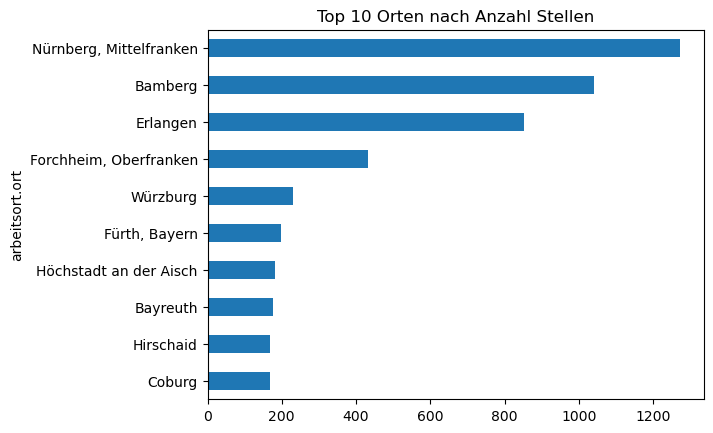

In [108]:
# Top cities by job postings and share of top 10 employers
by_ort = df_jobs_cleaned['arbeitsort.ort'].value_counts() 

print(by_ort.head(16))

top10_share = df_jobs_cleaned['arbeitgeber'].value_counts(normalize=True).head(10).sum() 

print(f"Top-10 employers share: {top10_share:.1%}")

df_jobs_cleaned['arbeitsort.ort'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Orten nach Anzahl Stellen')


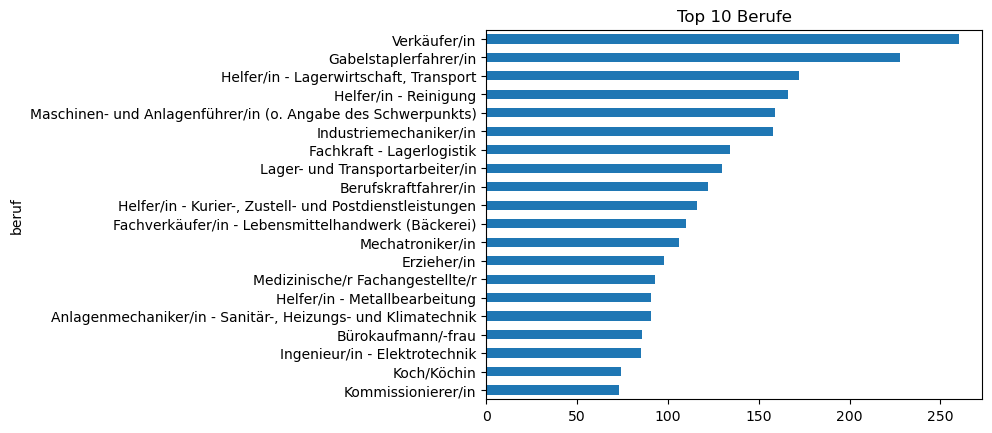

In [109]:
# Bar chart of top 20 professions
df_jobs_cleaned['beruf'].value_counts().head(20).plot(kind='barh', title='Top 10 Berufe')
plt.gca().invert_yaxis()


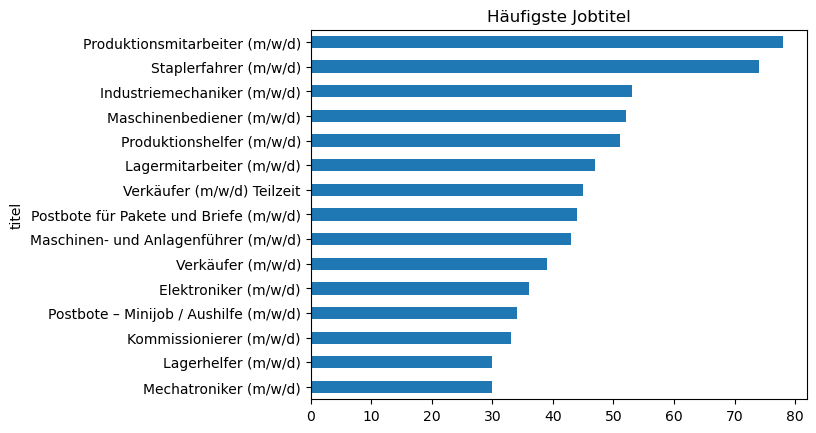

In [110]:
# Bar chart of top 15 most frequent job titles
df_jobs_cleaned['titel'].value_counts().head(15).plot(kind='barh', title='Häufigste Jobtitel')
plt.gca().invert_yaxis()

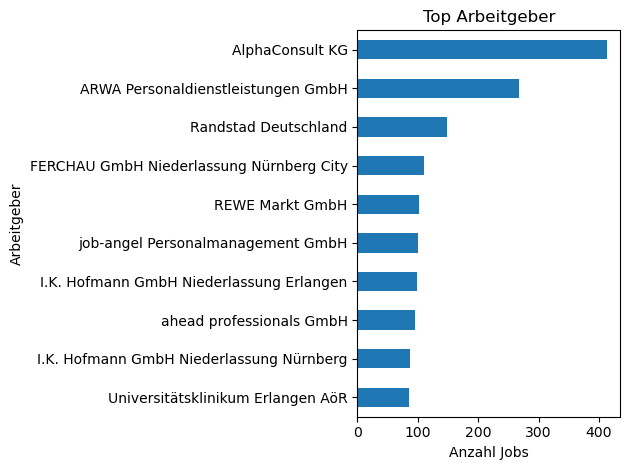

In [111]:
# Bar chart of top 10 employers by job postings
df_jobs_cleaned['arbeitgeber'] \
    .value_counts() \
    .head(10) \
    .plot(kind='barh', title='Top Arbeitgeber')

plt.xlabel("Anzahl Jobs")
plt.ylabel("Arbeitgeber")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


weekday
Wednesday    2692
Tuesday      2145
Monday       1731
Friday       1416
Thursday     1332
Saturday      355
Sunday        215
Name: count, dtype: int64


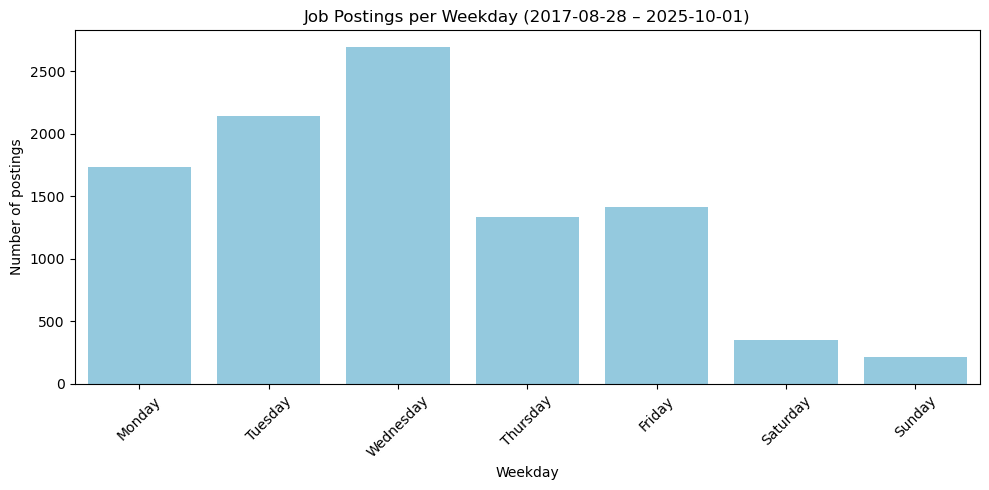

In [112]:
# Date range
min_date = df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'].min()
max_date = df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'].max()

# Extract weekday name (e.g. Monday, Tuesday)
df_jobs_cleaned['weekday'] = df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'].dt.day_name()

# Get weekday counts in correct order (Mon → Sun)
weekday_counts = df_jobs_cleaned['weekday'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

print(df_jobs_cleaned['weekday'].value_counts())

# Plot weekday postings
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, color="skyblue")
plt.title(f"Job Postings per Weekday ({min_date.date()} – {max_date.date()})")
plt.xlabel("Weekday")
plt.ylabel("Number of postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Timing & Freshness

weekday
Wednesday    2692
Tuesday      2145
Monday       1731
Friday       1416
Thursday     1332
Saturday      355
Sunday        215
Name: count, dtype: int64


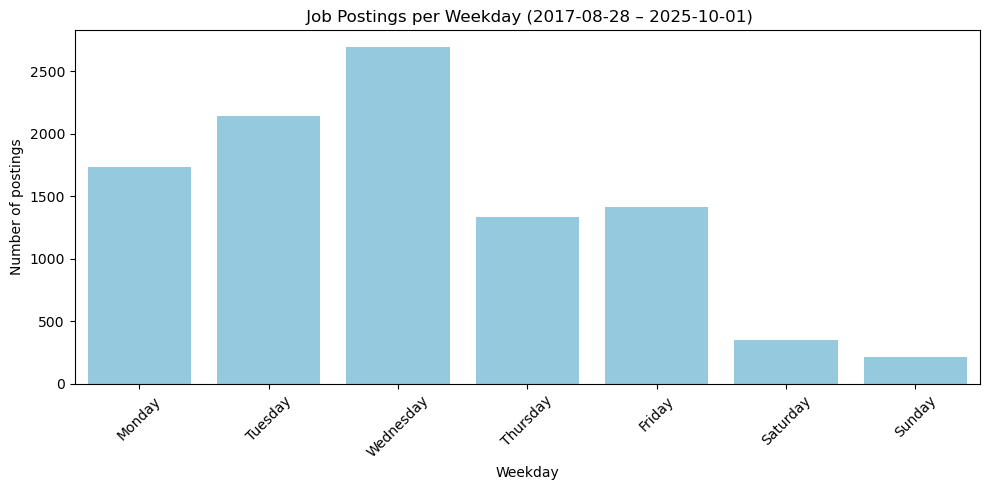

In [113]:
# Date range

# Extract weekday name (e.g. Monday, Tuesday)
df_jobs_cleaned['weekday'] = df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'].dt.day_name()

# Get weekday counts in correct order (Mon → Sun)
weekday_counts = df_jobs_cleaned['weekday'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
print(df_jobs_cleaned['weekday'].value_counts())

# Bar chart of job postings per weekday (date range shown in title)
# Plot weekday postings
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, color="skyblue")
plt.title(f" Job Postings per Weekday ({min_date.date()} – {max_date.date()})")
plt.xlabel("Weekday")
plt.ylabel("Number of postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


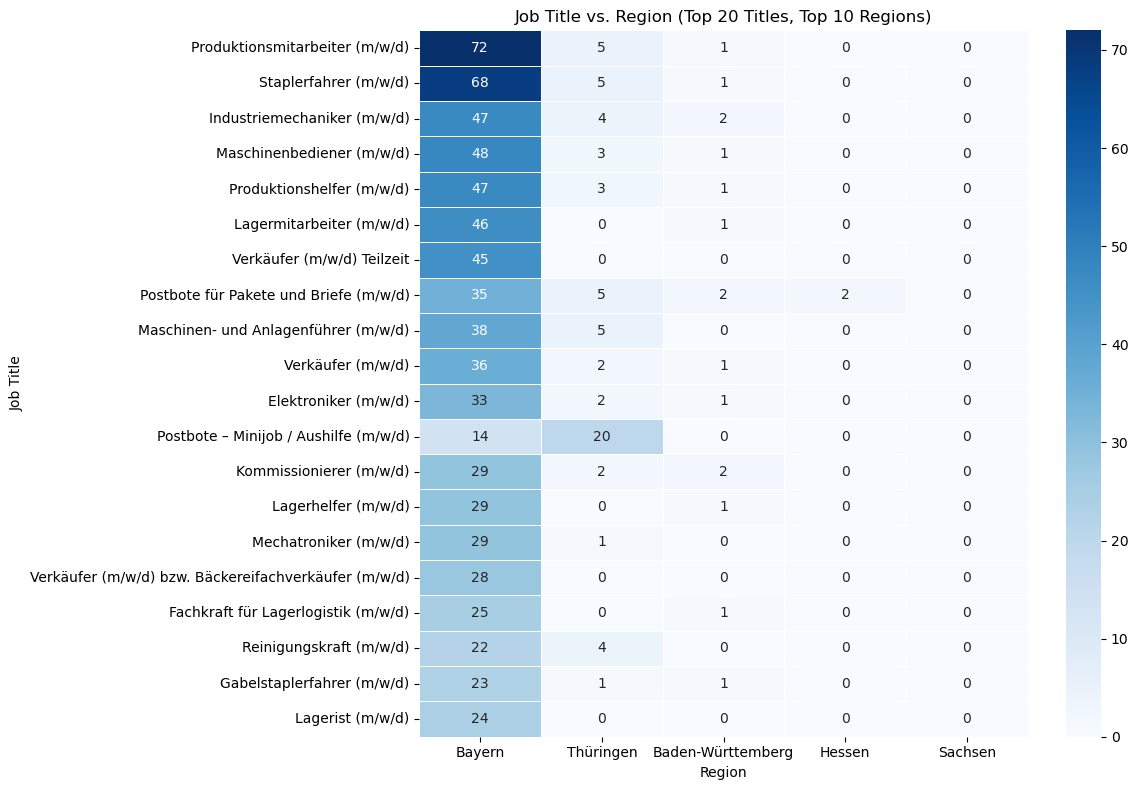

In [114]:
# Heatmap of top 20 job titles vs. top 10 regions
# Job title vs. Region (Top 20 titles)
job_region_ct = pd.crosstab(df_jobs_cleaned['titel'], df_jobs_cleaned['arbeitsort.region'])
job_region_ct = job_region_ct.loc[df_jobs_cleaned['titel'].value_counts().head(20).index]
job_region_ct = job_region_ct.loc[:, job_region_ct.sum().sort_values(ascending=False).head(10).index]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(job_region_ct, cmap='Blues', linewidths=.5, annot=True, fmt='d')
plt.title("Job Title vs. Region (Top 20 Titles, Top 10 Regions)")
plt.xlabel("Region")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


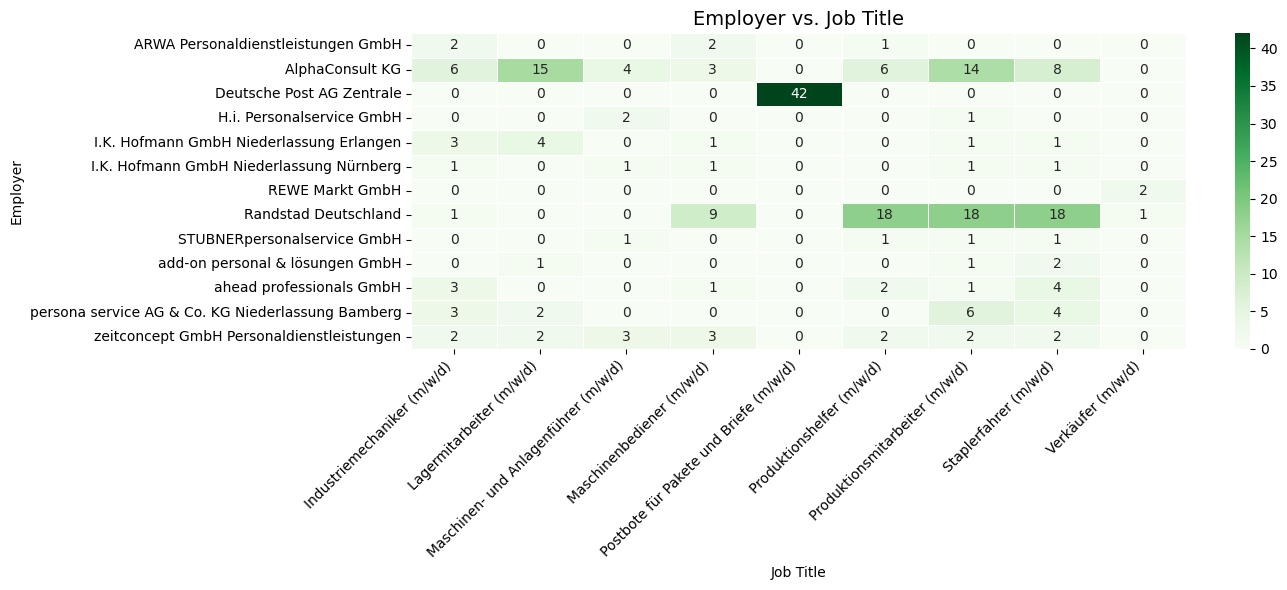

In [115]:
# Heatmap of employers vs. job titles

# Create cross-tab (employers vs job titles)
employer_title_ct = pd.crosstab(
    df_jobs_cleaned['arbeitgeber'],
    df_jobs_cleaned['titel']
)


# Top 20 employers and top 10 job titles
top_employers = df_jobs_cleaned['arbeitgeber'].value_counts().head(20).index
top_titles = df_jobs_cleaned['titel'].value_counts().head(10).index

employer_title_ct = pd.crosstab(
    df_jobs_cleaned[df_jobs_cleaned['arbeitgeber'].isin(top_employers)]['arbeitgeber'],
    df_jobs_cleaned[df_jobs_cleaned['titel'].isin(top_titles)]['titel']
)


# Heatmap of employers vs. job titles
plt.figure(figsize=(14, 6))
sns.heatmap(employer_title_ct, cmap='Greens', linewidths=.5, annot=True, fmt='d')

plt.title("Employer vs. Job Title", fontsize=14)
plt.xlabel("Job Title")
plt.ylabel("Employer")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


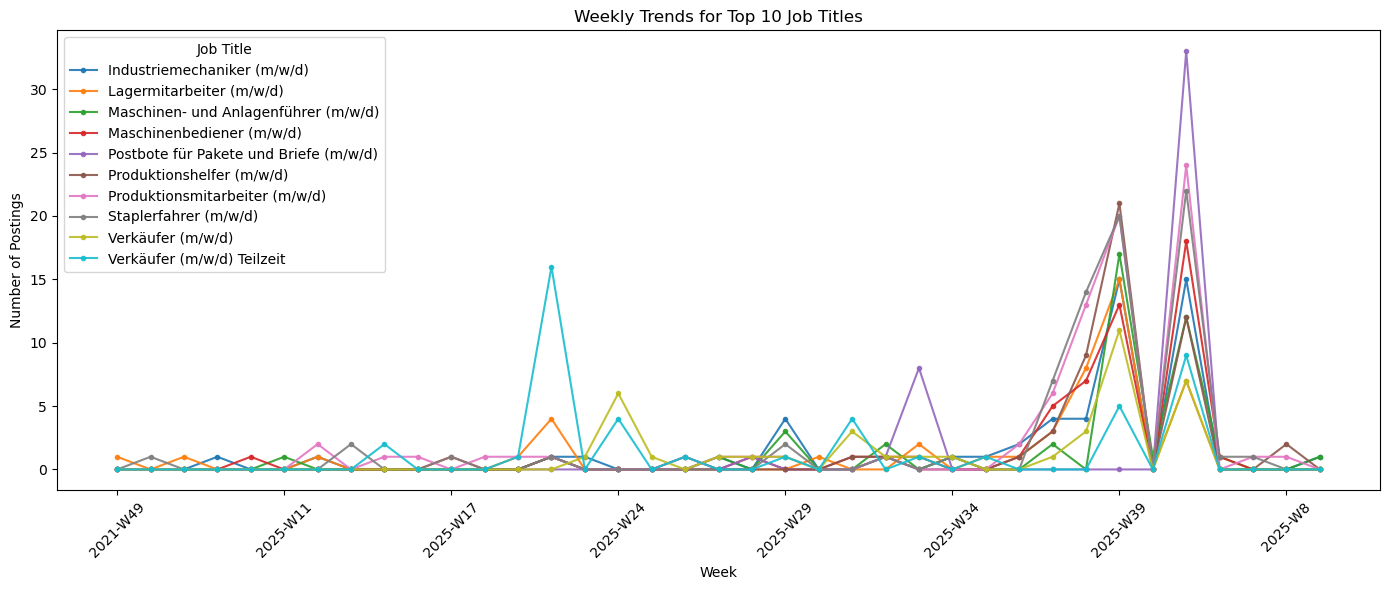

In [117]:
# Make sure we have a proper datetime column
df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'] = pd.to_datetime(
    df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'], errors='coerce'
)

# Extract ISO year + week
df_jobs_cleaned['year_week'] = (
    df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'].dt.isocalendar().year.astype(str)
    + "-W" +
    df_jobs_cleaned['aktuelleVeroeffentlichungsdatum'].dt.isocalendar().week.astype(str)
)

# top_titles (already defined earlier)
# Group by year_week and job title → pivot into wide format
weekly_title_trends = (
    df_jobs_cleaned[df_jobs_cleaned['titel'].isin(top_titles)]
    .groupby(['year_week', 'titel'])
    .size()
    .unstack(fill_value=0)   # pivot titles into columns
)

# Now plot
weekly_title_trends.plot(
    figsize=(14, 6),
    marker='.',
    linewidth=1.5,
    alpha=0.9
)
plt.title("Weekly Trends for Top 10 Job Titles")
plt.ylabel("Number of Postings")
plt.xlabel("Week")
plt.xticks(rotation=45)
plt.legend(title="Job Title")
plt.tight_layout()
plt.show()


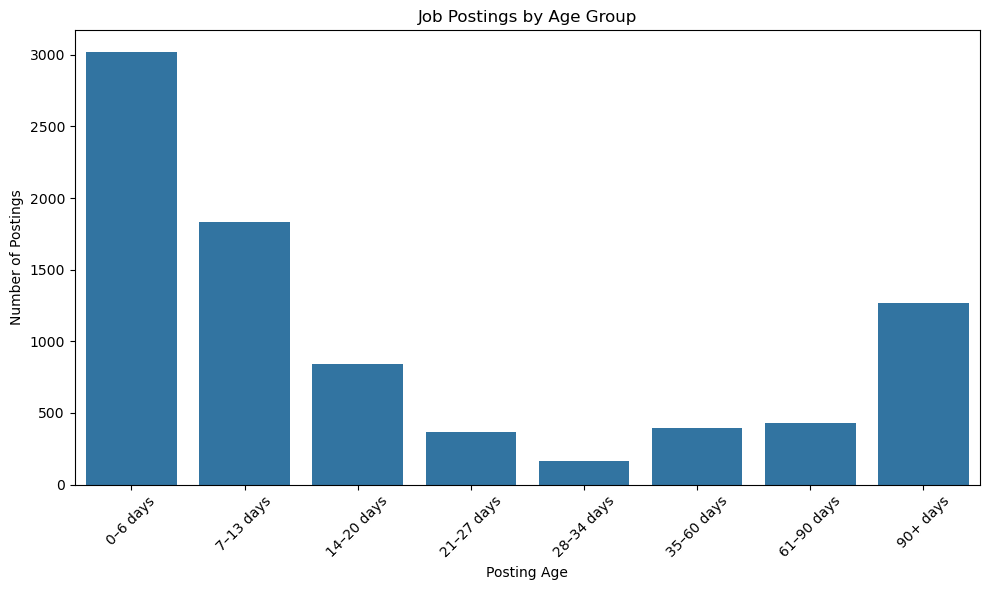

In [118]:
# Calculate job posting age, group into ranges, and plot distribution

# Today's date
today = pd.Timestamp.today().normalize()

# Calculate posting age
df_jobs_cleaned['posting_age_days'] = (today - df_jobs_cleaned['aktuelleVeroeffentlichungsdatum']).dt.days

# Bin into ranges
bins = [0, 6, 13, 20, 27, 34, 60, 90, 999]
labels = ['0–6 days', '7–13 days', '14–20 days', '21–27 days', '28–34 days', '35–60 days', '61–90 days', '90+ days']
df_jobs_cleaned['posting_age_group'] = pd.cut(df_jobs_cleaned['posting_age_days'], bins=bins, labels=labels, right=True)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_jobs_cleaned, x='posting_age_group')
plt.title("Job Postings by Age Group")
plt.xlabel("Posting Age")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


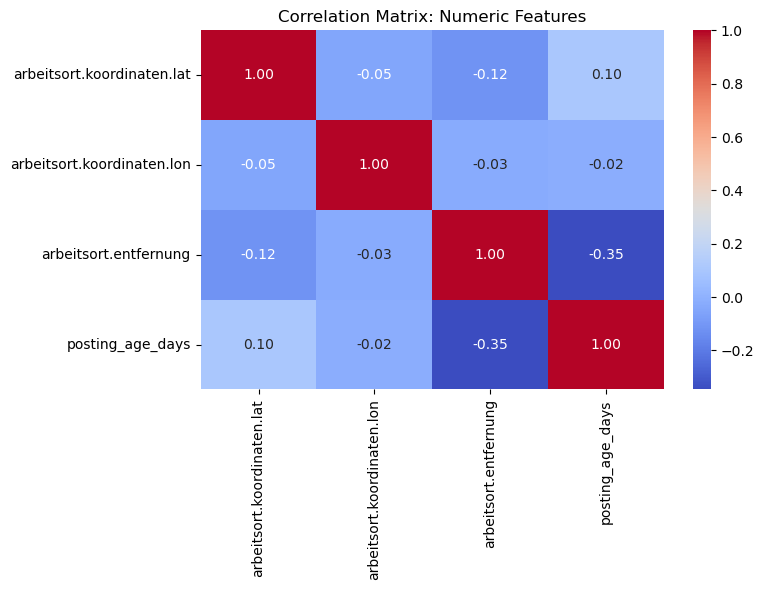

In [119]:
# visualize correlations between job posting features like location and posting age

# Ensure all numeric values are clean
df_jobs_cleaned['arbeitsort.entfernung'] = pd.to_numeric(df_jobs_cleaned['arbeitsort.entfernung'], errors='coerce')

# Select only numeric columns
numeric_cols = [
    'arbeitsort.koordinaten.lat',
    'arbeitsort.koordinaten.lon',
    'arbeitsort.entfernung',
    'posting_age_days'
]

# Drop NaNs for clean correlation
corr_data = df_jobs_cleaned[numeric_cols].dropna()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Numeric Features")
plt.tight_layout()
plt.show()


*(English Version)*  

# Key Insights — Germany Jobs Market Pulse

## Demand by location
- Nürnberg (Mittelfranken) is the clear hotspot (\~1.3k postings), followed by Bamberg (~1.1k) and Erlangen (~0.85k). 
- The long tail includes Forchheim, Bayreuth, Würzburg, Fürth, Höchstadt a.d. Aisch, Hirschaid, and Coburg. 
- Interpretation: Franconia’s manufacturing/logistics corridor is driving most demand.
## Roles in demand
- By Beruf (occupation), demand is dominated by Verkäufer/in, Gabelstaplerfahrer/in, Maschinen- und Anlagenführer/in (o. Schwerpunkt), Helfer/in – Reinigung, Industriemechaniker/in, Fachkraft – Lagerlogistik, Mechatroniker/in. 
- By Jobtitel, the most frequent are Produktionsmitarbeiter (m/w/d), Staplerfahrer (m/w/d), Maschinenbediener (m/w/d), Produktionshelfer (m/w/d), Lagermitarbeiter (m/w/d).
- Interpretation: Hiring is operations-heavy (production, warehouse, driving, technical trades). IT/admin roles exist but are a minority in this snapshot.

## Employers
- Top posters include AlphaConsult KG (\~500+), ARWA Personaldienstleistungen GmbH (\~350), Randstad Deutschland (~200+), plus H.i. Personalservice, FERCHAU (Nürnberg City), Manpower, REWE, Universitätsklinikum Erlangen, I.K. Hofmann.
- Top-10 employer share ≈ 17.1% → market is fragmented but staffing agencies hold a big share, especially for industrial/warehouse roles.
- Heatmap (Employer × Job Title) confirms agencies are concentrated in production/warehouse titles.

## Timing & cadence
- Postings per week spike in mid-September 2025 (largest week ~4.3k). This is calculated using the derived year_week field (YYYY-W##) from aktuelleVeroeffentlichungsdatum, which aggregates postings by ISO year-week. The dataset is skewed toward 2025-09, consistent with your API window. 
- Weekday pattern: Most postings on Wednesday, then Tuesday and Monday; fewer on Friday/Thursday; very low on weekends (Sat/Sun).
- Use-case: Schedule scraping/alerts for Wed/Tue (and Mon as backup) to catch the bulk of new roles.
## Freshness (posting age)
- Distribution is front-loaded: the largest bucket is 0–6 days (>4k postings), then 7–13 days (\~1.7k). There’s also a visible 90+ days tail (~1.3k), likely long-open or republished roles. 
- KPI you can show in BI: Median posting age (plus share of postings < 7 days).

## Region & role mix
- Job Title × Region heatmap: counts are overwhelmingly in Bayern (fetch focus), with smaller volumes in Thüringen, Baden-Württemberg, etc. 
- Within Bayern, production/warehouse titles dominate—consistent with the location and employer patterns.

## Correlations (numeric features)
No strong linear relationships; a modest negative correlation between posting_age_days and entfernung (~-0.35) suggests newer postings are, on average, farther from your original center — likely an artifact of expanding the search radius recently. Not decision-relevant.

*(Detusche Version)*  

# Zentrale Erkenntnisse — Jobmarkt-Puls Deutschland


## Nachfrage nach Standort

- Nürnberg (Mittelfranken) ist der klare Hotspot (\~1.300 Stellen), gefolgt von Bamberg (~1.100) und Erlangen (~850).

- Im langen „Nachfrage-Schwanz“ finden sich Forchheim, Bayreuth, Würzburg, Fürth, Höchstadt a.d. Aisch, Hirschaid und Coburg.

- Interpretation: Die Nachfrage konzentriert sich auf den fränkischen Produktions- und Logistikkorridor.

## Gefragte Rollen

- Nach Beruf (Berufsbezeichnung): Hohe Nachfrage nach Verkäufer/in, Gabelstaplerfahrer/in, Maschinen- und Anlagenführer/in (o. Schwerpunkt), Helfer/in Reinigung, Industriemechaniker/in, Fachkraft – Lagerlogistik, Mechatroniker/in.

- Nach Jobtitel: Häufigste Nennungen sind Produktionsmitarbeiter (m/w/d), Staplerfahrer (m/w/d), Maschinenbediener (m/w/d), Produktionshelfer (m/w/d), Lagermitarbeiter (m/w/d).

- Interpretation: Der Markt ist stark operationslastig (Produktion, Lager, Logistik, technische Fachkräfte). IT- und Verwaltungsstellen sind vorhanden, aber in der Minderheit.

## Arbeitgeber

- Top-Poster: AlphaConsult KG (\~500+), ARWA Personaldienstleistungen GmbH (~350), Randstad Deutschland (~200+), außerdem H.i. Personalservice, FERCHAU (Nürnberg), Manpower, REWE, Universitätsklinikum Erlangen, I.K. Hofmann.

- Top-10-Arbeitgeber-Anteil ≈ 17,1 % → Der Markt ist fragmentiert, aber Zeitarbeitsfirmen dominieren stark im Produktions- und Logistiksegment.

- Heatmap (Arbeitgeber × Jobtitel) bestätigt: Personaldienstleister konzentrieren sich klar auf Produktions-/Lagerprofile.

## Timing & Kadenz

- Stellen pro Woche: Deutlicher Peak Mitte September 2025 (~4.300 Postings). Berechnet über das Feld year_week (YYYY-W##) aus aktuelleVeroeffentlichungsdatum (ISO-Kalenderwoche). Datensatz insgesamt stark auf September 2025 fokussiert (bedingt durch API-Fenster).

- Wochentagsmuster: Die meisten Postings erscheinen am Mittwoch, gefolgt von Dienstag und Montag. Weniger an Donnerstag/Freitag, kaum an Wochenenden.

- Use Case: Use Case: Scraping/Alerts am besten auf Mittwoch/Dienstag (optional Montag als Backup) legen, um den Großteil neuer Stellen zu erfassen.

## Frische (Posting-Alter)

- Verteilung: Starke Konzentration auf 0–6 Tage alt (>4.000 Postings), danach 7–13 Tage (\~1.700). Längere „Tail“ bei >90 Tagen (~1.300), vermutlich lange offene oder neu veröffentlichte Anzeigen.

- BI-KPI: Median Posting Age + Anteil < 7 Tage.

## Regionen- & Rollenmix

- Jobtitel × Region Heatmap: Klarer Schwerpunkt in Bayern (durch den API-Fokus), kleinere Volumina in Thüringen und Baden-Württemberg.

- Innerhalb Bayerns dominieren Produktions- und Lagerstellen → konsistent mit den Standort- und Arbeitgebermustern.

## Korrelationen (numerische Features)

- Keine starken linearen Zusammenhänge. Eine moderate negative Korrelation (ca. -0,35) zwischen Posting-Alter (Tage) und Entfernung: neuere Stellen sind im Schnitt etwas weiter entfernt vom ursprünglichen Suchzentrum. Vermutlich Artefakt durch jüngst erweiterten Suchradius, nicht entscheidungsrelevant.